In [1]:

# Configs
SEED = 442
sensitive_attributes = ['G', 'SES']
sensitive_attributes_priv_values = [1, 1]
groups_info = {
    'SES': ['SES_priv', 'SES_dis'],
    'G': ['G_priv', 'G_dis'],
    'intersectional' : ['G_priv_SES_priv', 'G_priv_SES_dis', 'G_dis_SES_priv', 'G_dis_SES_dis']
}

In [2]:
competitions_config = {
    'school': {
        'competition_prevalence': 0.7,
        'competition_external_fraction': 0,
        'var_names' : ['X1', 'X2', 'X3', 'Z1'],
        'coeffs' : [1, 1, 2, 2.5],
        'target_name' : 'Y1',
        'input_columns_rank_order' : ['Z1', 'X3']
    },

    'college_1': {
        'competition_prevalence': 0.15,
        'competition_external_fraction': 0.5,
        'var_names' : ['X1', 'X2', 'X3', 'Z2'],
        'coeffs' : [1, 1, 2, 2.5],
        'target_name' : 'Y2',
        'input_columns_rank_order' : ['Z2', 'X3', 'Z1']
    },

    'college_2': {
        'competition_prevalence': 0.3,
        'competition_external_fraction': 0.5,
        'var_names' : ['X1', 'X2', 'X3', 'Z3', 'Z2', 'Z1'],
        'coeffs' : [1, 1, 1, 2, 0, 0],
        'target_name' : 'Y3',
        'input_columns_rank_order' : ['Z3', 'X3', 'Z2', 'Z1']
    },

    'job_1': {
        'competition_prevalence': 0.2,
        'competition_external_fraction': 0.2,
        'var_names' : ['X1', 'X2', 'X3', 'Z4', 'Z3', 'Z2', 'Z1'],
        'coeffs' : [1, 1, 1, 2, 0, 0, 0],
        'target_name' : 'Y4',
        'input_columns_rank_order' : ['Z4', 'X3', 'Z3', 'Z2', 'Z1']
    },

    'job_2': {
        'competition_prevalence': 0.08,
        'competition_external_fraction': 0.05,
        'var_names' : ['X1', 'X2', 'X3', 'Z5', 'Z4', 'Z3', 'Z2', 'Z1'],
        'coeffs' : [1, 1, 1, 2, 0, 0, 0, 0],
        'target_name' : 'Y5',
        'input_columns_rank_order' : ['Z5', 'X3', 'Z4', 'Z3', 'Z2', 'Z1']
    }
}

In [3]:
from DataGenerator import initialize_base_population
from Competition import GenericCompetition
from utils.common_helpers import set_protected_groups, score_based_set_selection, add_external_applicants, add_qualification_from_desirable_position
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Initialize base population
base_model = initialize_base_population()
base_state = base_model.simulate(n_samples=2000, seed=SEED)

  0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
# Competition 1: School
competition = competitions_config['school']
C1 = GenericCompetition(base_state, sensitive_attributes, sensitive_attributes_priv_values)
c1_selected_df = score_based_set_selection(df = C1.applicant_pool, 
                                        var_names = competition['var_names'], 
                                        coeffs = competition['coeffs'],
                                        target_name = competition['target_name'], 
                                        input_columns_rank_order= competition['input_columns_rank_order'],
                                        k = round(competition['competition_prevalence'] * len(C1.applicant_pool)))
__ = C1.compute_metrics(c1_selected_df, competition['target_name'], 1)
__ = C1.compute_contest_chances_disparity(groups_info)


# Competition 2: College 1
competition = competitions_config['college_1']
# Add applicants to the pool
pop_after_C1 = add_external_applicants(C1.selected, competition['competition_external_fraction'], base_model, SEED)
c1_applicant_pool = add_qualification_from_desirable_position(df = pop_after_C1, competition_label=C1.target_name, 
                                                              desirable_label=1, generated_score_name='Z2')
C2 = GenericCompetition(c1_applicant_pool, sensitive_attributes, sensitive_attributes_priv_values)
c2_selected_df = score_based_set_selection(df = C2.applicant_pool,
                                        var_names = competition['var_names'],
                                        coeffs = competition['coeffs'],
                                        target_name = competition['target_name'],
                                        input_columns_rank_order= competition['input_columns_rank_order'],
                                        k = round(competition['competition_prevalence'] * len(C2.applicant_pool)))
__ = C2.compute_metrics(c2_selected_df, competition['target_name'], 1)
__ = C2.compute_contest_chances_disparity(groups_info)


# Competition 3: College 2
competition = competitions_config['college_2']
# Add applicants to the pool
pop_after_C2 = add_external_applicants(C2.selected, competition['competition_external_fraction'], base_model, SEED)
c2_applicant_pool = add_qualification_from_desirable_position(df = pop_after_C2, competition_label=C2.target_name,
                                                                desirable_label=1, generated_score_name='Z3')
C3 = GenericCompetition(c2_applicant_pool, sensitive_attributes, sensitive_attributes_priv_values)
c3_selected_df = score_based_set_selection(df = C3.applicant_pool,
                                        var_names = competition['var_names'],
                                        coeffs = competition['coeffs'],
                                        target_name = competition['target_name'],
                                        input_columns_rank_order= competition['input_columns_rank_order'],
                                        k = round(competition['competition_prevalence'] * len(C3.applicant_pool)))
__ = C3.compute_metrics(c3_selected_df, competition['target_name'], 1)
__ = C3.compute_contest_chances_disparity(groups_info)


# Competition 4: Job 1
competition = competitions_config['job_1']
# Add applicants to the pool
pop_after_C3 = add_external_applicants(C3.selected, competition['competition_external_fraction'], base_model, SEED)
c3_applicant_pool = add_qualification_from_desirable_position(df = pop_after_C3, competition_label=C3.target_name,
                                                                desirable_label=1, generated_score_name='Z4')
C4 = GenericCompetition(c3_applicant_pool, sensitive_attributes, sensitive_attributes_priv_values)
c4_selected_df = score_based_set_selection(df = C4.applicant_pool,
                                        var_names = competition['var_names'],
                                        coeffs = competition['coeffs'],
                                        target_name = competition['target_name'],
                                        input_columns_rank_order= competition['input_columns_rank_order'],
                                        k = round(competition['competition_prevalence'] * len(C4.applicant_pool)))
__ = C4.compute_metrics(c4_selected_df, competition['target_name'], 1)
__ = C4.compute_contest_chances_disparity(groups_info)


# Competition 5: Job 2
competition = competitions_config['job_2']
# Add applicants to the pool
pop_after_C4 = add_external_applicants(C4.selected, competition['competition_external_fraction'], base_model, SEED)
c4_applicant_pool = add_qualification_from_desirable_position(df = pop_after_C4, competition_label=C4.target_name,
                                                                desirable_label=1, generated_score_name='Z5')
C5 = GenericCompetition(c4_applicant_pool, sensitive_attributes, sensitive_attributes_priv_values)
c5_selected_df = score_based_set_selection(df = C5.applicant_pool,
                                        var_names = competition['var_names'],
                                        coeffs = competition['coeffs'],
                                        target_name = competition['target_name'],
                                        input_columns_rank_order= competition['input_columns_rank_order'],
                                        k = round(competition['competition_prevalence'] * len(C5.applicant_pool)))
__ = C5.compute_metrics(c5_selected_df, competition['target_name'], 1)
__ = C5.compute_contest_chances_disparity(groups_info)


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/falaaharifkhan/Documents/EO_Experiments/utils/common_helpers.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = base_population.append(external_applicants, ignore_index=True)


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/falaaharifkhan/Documents/EO_Experiments/utils/common_helpers.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = base_population.append(external_applicants, ignore_index=True)


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/falaaharifkhan/Documents/EO_Experiments/utils/common_helpers.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = base_population.append(external_applicants, ignore_index=True)


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/falaaharifkhan/Documents/EO_Experiments/utils/common_helpers.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = base_population.append(external_applicants, ignore_index=True)


In [6]:
competition_list = {
    "school" : C1,
    "college_1" : C2,
    "college_2": C3,
    "job_1": C4,
    "job_2": C5
}

In [7]:
res_df = None
contest_chances = {
    'SES' : [],
    'G' : [],
    'intersectional' : []
}
competition_prevalences = []

for competition_name in competition_list.keys():
    competition_prevalences.append(competition_list[competition_name].overall_prevalence)
    temp_result = competition_list[competition_name].metrics
    temp_result['competition'] = [competition_name]*len(temp_result)

    if res_df is None:
        res_df = temp_result
    else:
        res_df = pd.concat([res_df, temp_result], ignore_index=True)

    for group in groups_info.keys():
        contest_chances[group].append(competition_list[competition_name].contest_chances_disparity[group])

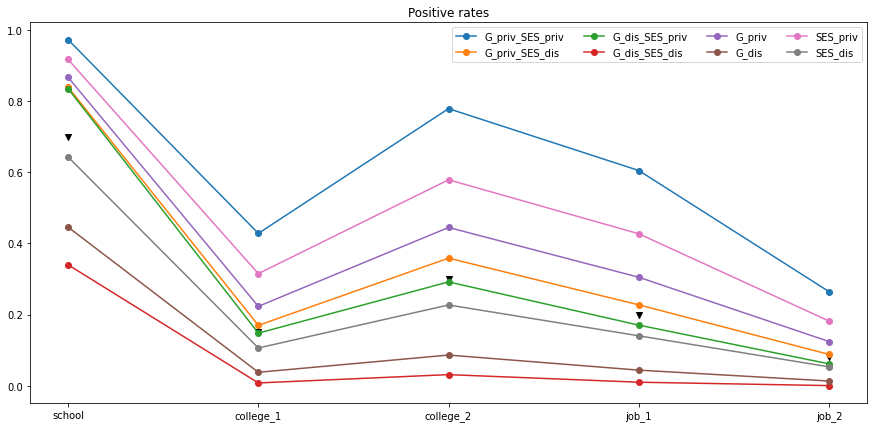

In [8]:
plt.figure(figsize=(15,7))

xx = list(competition_list.keys())
for group_ in C1.social_groups.keys():
    yy = res_df[(res_df.metric_name == 'prevalence') & (res_df.group_name == group_)]['metric_values']
    plt.plot(xx, yy, marker='o', label=group_)

plt.scatter(xx, competition_prevalences, marker='v', c='black')
plt.title("Positive rates")
plt.legend(ncol=4)
plt.show()

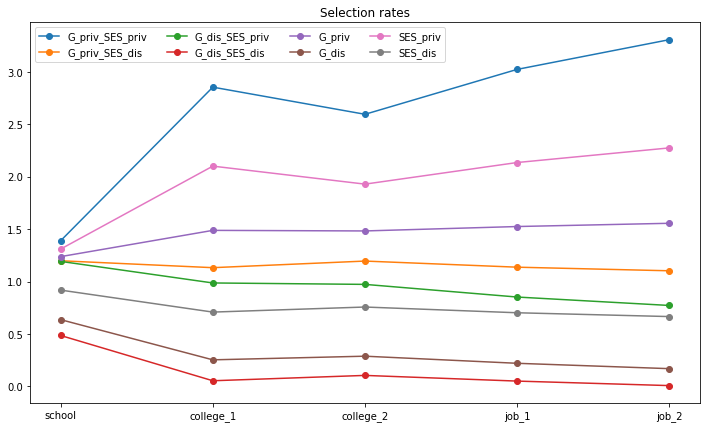

In [9]:
plt.figure(figsize=(12,7))

xx = list(competition_list.keys())
for group_ in C1.social_groups.keys():
    yy = res_df[(res_df.metric_name == 'selection_rate') & (res_df.group_name == group_)]['metric_values']
    plt.plot(xx, yy, marker='o', label=group_)

#plt.scatter(xx, prevalences, marker='v' ,c='black')
plt.title("Selection rates")
plt.legend(ncol=4, loc='upper left')
plt.show()

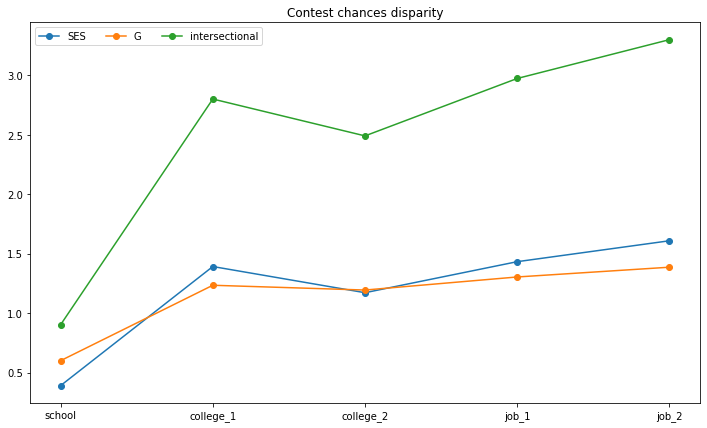

In [10]:
plt.figure(figsize=(12,7))

xx = list(competition_list.keys())
for group_ in contest_chances.keys():
    yy = contest_chances[group_]
    plt.plot(xx, yy, marker='o', label=group_)

#plt.scatter(xx, prevalences, marker='v' ,c='black')
plt.title("Contest chances disparity")
plt.legend(ncol=4, loc='upper left')
plt.show()

In [11]:
for competition in competition_list:
    print(competition, competition_list[competition].applicant_pool.shape[0])

school 2000
college_1 4000
college_2 8000
job_1 10000
job_2 10526
